# AFC

In [1]:
import pandas as pd
import numpy as np
from fanalysis.ca import CA

In [2]:
# Lire le fichier Excel
data = pd.read_excel("train (1).xlsx")

In [3]:
# Vérifier les valeurs manquantes
missing_values = data.isnull().sum()
print("Valeurs manquantes par colonne:\n", missing_values)

Valeurs manquantes par colonne:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [4]:
# Définir 'Loan_Status' comme l'index
df = data.set_index("Loan_Status")

In [5]:
# Convertir toutes les colonnes en valeurs numériques, en forçant les erreurs à NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [6]:
# Imprimer les types de données après la conversion
print("Types de données après conversion :\n", df.dtypes)

Types de données après conversion :
 Loan_ID              float64
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area        float64
dtype: object


In [7]:
# Remplacer les valeurs infinies par NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
# Vérifier les valeurs infinies après le remplacement
print("Valeurs infinies par colonne après remplacement:\n", np.sum(~np.isfinite(df.values), axis=0))


Valeurs infinies par colonne après remplacement:
 [500 500 500  43 500 500   0   0   0   0   0 500]


In [9]:
# Vérifier les valeurs NaN après la conversion
nan_mask = np.isnan(df.values)
print("Valeurs NaN par colonne après conversion:\n", np.sum(nan_mask, axis=0))


Valeurs NaN par colonne après conversion:
 [500 500 500  43 500 500   0   0   0   0   0 500]


In [10]:
# Supprimer les colonnes avec plus de 20% de valeurs NaN
threshold = 0.2
df = df.loc[:, df.isnull().mean() < threshold]

In [11]:
# Remplacer les valeurs NaN : colonnes numériques par la moyenne, catégorielles par le mode
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
# Vérifier les valeurs NaN après le remplissage
nan_mask_after = np.isnan(df.values)
print("Valeurs NaN par colonne après remplissage:\n", np.sum(nan_mask_after, axis=0))


Valeurs NaN par colonne après remplissage:
 [0 0 0 0 0 0]


In [13]:
# Supprimer les lignes contenant des valeurs NaN restantes
df.dropna(inplace=True)

In [14]:
# Vérifier qu'il n'y a plus de valeurs NaN
nan_mask_final = np.isnan(df.values)
print("Valeurs NaN par colonne après tentative de remplissage final:\n", np.sum(nan_mask_final, axis=0))


Valeurs NaN par colonne après tentative de remplissage final:
 [0 0 0 0 0 0]


In [15]:
# Supprimer les colonnes avec une faible variance
variances = df.var()
low_variance_cols = variances[variances == 0].index
df.drop(columns=low_variance_cols, inplace=True)

In [16]:
# Définir les données à utiliser dans l'AC
interested_data = df

In [17]:

# Créer une instance de la classe CA
afc = CA(row_labels=interested_data.index.values, col_labels=interested_data.columns.values, stats=True)


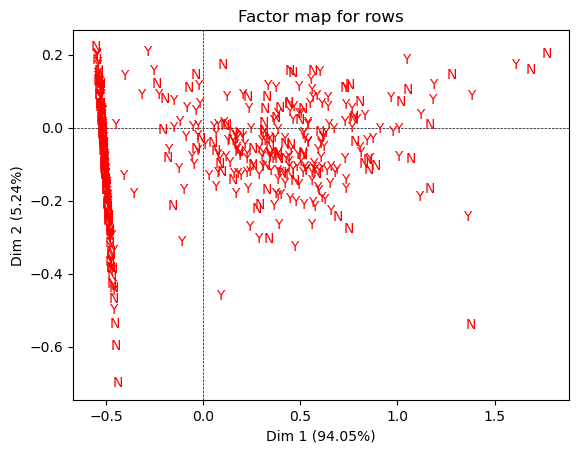

In [19]:
# Exécuter l'analyse de correspondance
try:
    afc.fit(interested_data.values)

    # Vérifier si les coordonnées des lignes sont calculées
    if hasattr(afc, 'row_coord_') and afc.row_coord_.size > 0:
        # Tracer la cartographie des lignes
        afc.mapping_row(num_x_axis=1, num_y_axis=2)
    else:
        print("Error: row_coord_ is not populated. Ensure the CA analysis was successful.")
except Exception as e:
    print(f"An error occurred during CA analysis: {e}")

# Interprétation
Dim 1 (94.05%) capture la majorité de la variance totale des données, expliquant 94.05% de l'information. Dim 2 (5.24%) capture 5.24% de la variance totale ajoutant des variations dans les données qui ne sont pas expliquées par Dim 1.Ces variations peuvent inclure des différences subtiles dans les caractéristiques des demandes de prêt qui contribuent à la distinction entre les prêts approuvés et refusés.
Bien que Dim 1 capture une grande partie de la variance, il n'y a pas de séparation nette entre les points "Y" et "N". Cela signifie que les deux premières dimensions identifiées par l'analyse de correspondance ne permettent pas de discriminer clairement entre les prêts approuvés et refusés. Les points sont concentrés autour du centre du graphique, suggérant que la plupart des observations partagent des caractéristiques communes et sont relativement similaires les unes aux autres. Cependant, quelques points "N" se trouvent loin du centre, indiquant des caractéristiques distinctes ou atypiques.